# File Parsing

Now making lists for data points is all good and dandy, but what if you have <h3>lots</h3> of data?

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Consider the following example where we read Voyager-2 data.
[Voyager-2](https://voyager.jpl.nasa.gov) is a spacecraft that was launched in [1977](https://en.wikipedia.org/wiki/Voyager_2). It collects data about the local space environment, including the flux (or rate per unit time and area) of electrons and protons in the nearby environnment.

Let's try reading the file.

We're going to use python's built-in functions to read data from a NASA Voyager data. 

The line below [opens](https://docs.python.org/3/library/functions.html#open) a file called ```VY2PLA_1H_FMT.txt``` in folder ```infiles```. If you look in the github or in your file folder containing these notebooks, you should find a folder called ```infiles``` and a file therein called ```VY2PLA_1H_FMT.txt```. The ```"r"``` string at the end tells the computer to open the file for _reading_ rather than for _writing_ (or something else).


In [5]:
outfile = open("infiles/VY2PLA_1H_FMT.txt","r")
print(outfile.name)

infiles/VY2PLA_1H_FMT.txt


You might think, "Great work!", but of course, you know that when you open a file in say, Microsoft Word, and you want to know what's in there, you have to read it. You have to tell the computer to do that too. We will use [readlines()]() to do it here.

In [4]:
data=outfile.readlines()

infiles/VY2PLA_1H_FMT.txt


This readlines all the lines in the file. How many lines are there?

In [6]:
len(data)

50

And what's in the file?

In [8]:
print(data)

['File: VY2PLA_1H_FMT.txt                       Version: NSSDC 12/31/98 MIT\n', '-------------------------------------------------------------------------\n', '\n', 'The files in this directory contain Voyager hourly average plasma data.\n', 'The plasma parameters are obtained by finding the best fit of a convected\n', 'isotropic Maxwellian distribution to the data. One sigma errors\n', 'are typically less than 0.5% in the speed and VR, less than 5% for the\n', 'density and thermal speed, and vary greatly for VT and VN.\n', 'Sampling times range from 12 to 192 sec., with sampling generally more\n', 'frequent early in the mission. The columns are:\n', '\n', '1) Year                                         \n', '2) day of year (day 1 is Jan. 1)\n', '3) hour\n', '4) proton speed in km/s (magnitude of V)\n', '5) proton density in cm-3\n', '6) proton thermal speed in km/s (proton temperature in eV = .0052 times the\n', 'square of the thermal speed)\n', '7) VR\n', '8) VT (WARNING: this param

Look carefully at the list above that gets returned by readlines. You'll see that each item in the list is a string that corresponds to a single line of text in the file. Each string ends with ```\n``` which is a formatting command that tells the computer to go to the next line.

#### <span style="color:blue"> Exercise 4.1 </span>
So that you can read the information in the line a little easier, write a for loop that prints each line in the file on a single line.

In [10]:
# Write a for loop that prints each line in the file.

### Parsing data

The file we read ```VY2PLA_1H_FMT.txt``` tells us about how the data is formatted in the data files. Armed with that information (go back and review if you didn't already), we can proceed to extract individual data points from the data files. ```v2_hour_2007.txt``` is one such file.

In [14]:
# that defines the format. Now we want to read the data itself
datafile = open("infiles/v2_hour_2007.txt","r")
data=datafile.readlines()
print(datafile.name)

infiles/v2_hour_2007.txt


In [13]:
print(len(data))

1728


In [15]:
for line in data[0:4]:
    print(line,)

2007   1 18  397.4  0.00093   16.5  396.3    2.9  -24.1

2007   1 19  389.1  0.00078    8.7  388.8   -4.9   13.9

2007   1 20  395.9  0.00063    8.0  395.8   -6.4    6.1

2007   2 23  406.4  0.00095   25.2  406.2   10.0   -0.7



Let's try to extract the date (year, month, day-of-year). I can see from the formatting information that the year is the first column of the data, the month is the second column, and hte day-of-year is the third column.

So let's try ```line[0], line[1], line[2]``` in our for loop above.

In [19]:
for line in data[0:4]:
    year = line[0]
    month = line[1]
    dayofyear = line[2]
    print(year, month, dayofyear)

2 0 0
2 0 0
2 0 0
2 0 0


Does it work? 

It shouldn't. That's because each line is a single string with all the data separated by spaces. So we have to split the line up by the string values. Review the docstring for [split()](https://docs.python.org/2/library/stdtypes.html#str.split). By default the split funciton looks for spaces and divides up the line, but you can split a line based on other delimiters if you want.

In [25]:
# cycle through each line and find a way to extract
# the year, day of year, hour, proton speed, proton density
# and proton temperature
for line in data[0:4]:
    split_line = line.split()
    print(split_line)
    print(float(split_line[0]))
    year = float(split_line[0])
    dayofyear = float(split_line[1])
    hour = float(split_line[2])
    proton_speed_kms = float(split_line[3])
    proton_density_cm3 = float(split_line[4])
    proton_temperature_K = float(split_line[5])**2*0.0052 * 11604.505

['2007', '1', '18', '397.4', '0.00093', '16.5', '396.3', '2.9', '-24.1']
2007.0
['2007', '1', '19', '389.1', '0.00078', '8.7', '388.8', '-4.9', '13.9']
2007.0
['2007', '1', '20', '395.9', '0.00063', '8.0', '395.8', '-6.4', '6.1']
2007.0
['2007', '2', '23', '406.4', '0.00095', '25.2', '406.2', '10.0', '-0.7']
2007.0


In [19]:
#Now store the data in arrays
years = []
days  = []
hours = []
proton_speeds_kms = []
proton_densities_cm3 = []
proton_temperatures_K = []

for line in data:
    split_line = line.split()

    years.append(float(split_line[0]))
    days.append(float(split_line[1]))
    hours.append(float(split_line[2]))
    proton_speeds_kms.append(float(split_line[3]))
    proton_densities_cm3.append(float(split_line[4]))
    proton_temperatures_K.append(float(split_line[5])**2*0.0052 * 11604.505)


Since its been traveling for more than **40 years**, Voyager-2 may have left the edge of the solar system by now. You might wonder, how do we not know whether it has or not? Isn't the size of the solar system known? 

Well, the answer is kind of. Voyager can help us understand how large the solar system is and its shape. You can tell by 

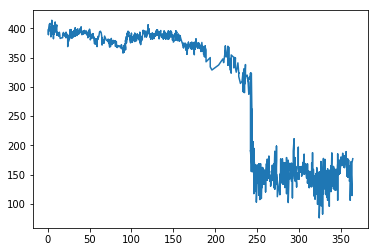

In [20]:
plt.plot(days, proton_speeds_kms)

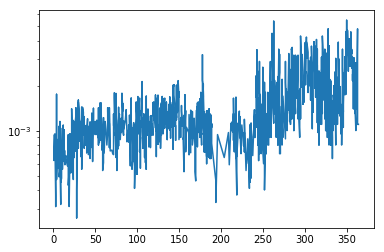

In [21]:
plt.semilogy(days, proton_densities_cm3)

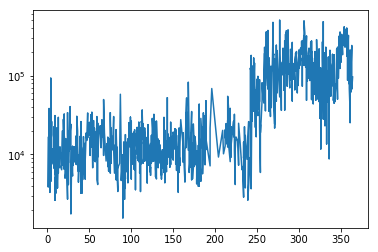

In [22]:
plt.semilogy(days,proton_temperatures_K)

In [23]:
# add write output to a file here
# now let's write our data to some files
import csv

writer = csv.writer(open('proton_speeds_kms.csv', 'w'))
for i,ps in enumerate(proton_speeds_kms):
    writer.writerow([days[i], ps])
writer = csv.writer(open('proton_densities_cm3.csv', 'w'))
for i,pd in enumerate(proton_densities_cm3):
    writer.writerow([days[i], pd])
writer = csv.writer(open('proton_temperatures_K.csv', 'w'))
for i,pt in enumerate(proton_temperatures_K):
    writer.writerow([days[i], pt])